# Voice Gender Recognition

#### This project was completed as a part of the George Washington University's Data Analysis and Visualization course, revisited and expanded after the course's completion.

#### In this project I built a logistic regression model using scikit-learn and a deep neural network using Keras to predict the gender of a speaker given data about their voice. I built the machine learning models and tested their predictions against the actual classifications.

Source data comes from Kory Becker of Primary Objects: http://www.primaryobjects.com/kory-becker/

GitHub Link: https://github.com/primaryobjects/voice-gender

Full Article: http://www.primaryobjects.com/2016/06/22/identifying-the-gender-of-a-voice-using-machine-learning/

Summary:

Gender Recognition by Voice and Speech Analysis

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).

## The Dataset
The following acoustic properties of each voice are measured and included within the CSV:

* meanfreq: mean frequency (in kHz)
* sd: standard deviation of frequency
* median: median frequency (in kHz)
* Q25: first quantile (in kHz)
* Q75: third quantile (in kHz)
* IQR: interquantile range (in kHz)
* skew: skewness (see note in specprop description)
* kurt: kurtosis (see note in specprop description)
* sp.ent: spectral entropy
* sfm: spectral flatness
* mode: mode frequency
* centroid: frequency centroid (see specprop)
* peakf: peak frequency (frequency with highest energy)
* meanfun: average of fundamental frequency measured across acoustic signal
* minfun: minimum fundamental frequency measured across acoustic signal
* maxfun: maximum fundamental frequency measured across acoustic signal
* meandom: average of dominant frequency measured across acoustic signal
* mindom: minimum of dominant frequency measured across acoustic signal
* maxdom: maximum of dominant frequency measured across acoustic signal
* dfrange: range of dominant frequency measured across acoustic signal
* modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
* label: male or female

In [1]:
# Dependencies
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

### Display the data in a DataFrame

In [2]:
voice = pd.read_csv('Resources/voice.csv')
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


## Data Pre-Processing

In [3]:
#Split dataset into audio data and gender label
X = voice.drop("label", axis=1)
y = voice["label"]
print(X.shape, y.shape)

(3168, 20) (3168,)


### Split training and testing data, Normalize the voice data

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import to_categorical

#Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y, test_size=.25)

#Normalize the training and testing data set
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Encode the labels for the neural network

In [22]:
#Encode Female/Male labels to numerical
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

#Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

# Create a Logistic Regression Model Using Scikit-Learn

### Initate and fit the model

In [23]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

#Fit the logistic regression model to our training data
logistic.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
#Check our accuracy score on the testing data
print(f"Training Data Score: {logistic.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {logistic.score(X_test_scaled, y_test)}")

Training Data Score: 0.9730639730639731
Testing Data Score: 0.9772727272727273


### Make Predictions Using the Logistic Regression Model

In [8]:
predictions = logistic.predict(X_test[:10])
pd.DataFrame({"Prediction": predictions,"Actual": y_test[:10]}).reset_index(drop=True)

,Actual,Prediction
0,female,female
1,female,female
2,male,female
3,female,female
4,male,female
5,male,female
6,female,female
7,female,female
8,male,female
9,male,female


# Create a Deep Learning Model Using Keras

In [24]:
from keras.models import Sequential
from keras.layers import Dense

# Create the model with two hidden layers
model = Sequential()
model.add(Dense(units = 100, activation = 'relu', input_dim = 20))
model.add(Dense(units = 100, activation = 'relu'))
model.add(Dense(units = 100, activation = 'relu'))
model.add(Dense(units = 2, activation = 'softmax'))

### Compile and fit the model

In [25]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs = 100, shuffle = 'true', verbose = 0)

### Check our model on the testing data

In [26]:
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test_categorical, verbose=2)
print(f"Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Neural Network - Loss: 0.1391439272040729, Accuracy: 0.9835858585858586


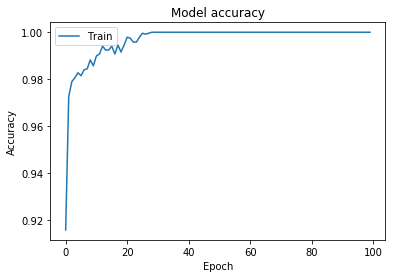

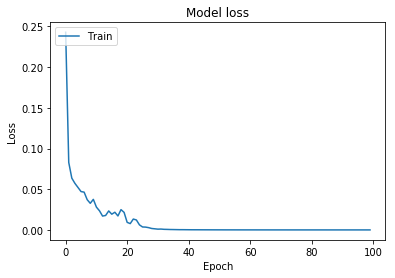

In [27]:
# Plot training accuracy values
plt.plot(model.history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training loss values
plt.plot(model.history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Make Predictions Using the Neural Network

In [28]:
#Check the first 10 predictions vs the actual labels using our deep neural network

encoded_predictions = model.predict_classes(X_test_scaled[:10])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

pd.DataFrame({"Neural Network Prediction": prediction_labels, "Actual": y_test[:10]}).reset_index(drop=True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,Actual,Neural Network Prediction
0,female,female
1,female,female
2,male,male
3,female,female
4,male,male
5,male,male
6,female,male
7,female,female
8,male,male
9,male,male
